In [1]:
pip install optuna xgboost scikit-learn pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded 1306 total rows from 76 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               310  0.006426  0.007678  0.026507  0.000163   
1               370  0.005384  0.006354  0.026507  0.000163   
2               340  0.005859  0.006213  0.026507  0.000762   
3               319  0.006265  0.003860  0.022233  0.000982   
4               400  0.004996  0.003286  0.013821  0.000228   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  17                   20             0  
1                  19                   20             0  
2                  19                   20             0  
3                  16                   20             0  
4                  21                   20             0  


c:\Users\Chirag\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


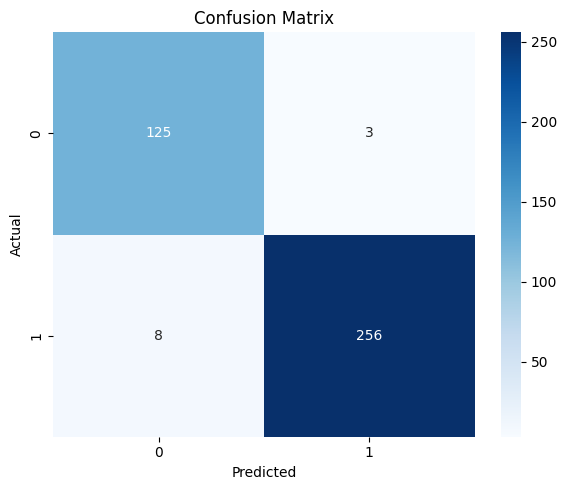


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       128
           1       0.99      0.97      0.98       264

    accuracy                           0.97       392
   macro avg       0.96      0.97      0.97       392
weighted avg       0.97      0.97      0.97       392


Confusion Matrix:
[[125   3]
 [  8 256]]

Accuracy Score:  0.9719
Precision Score: 0.9884
Recall Score:    0.9697
F1 Score:        0.9790


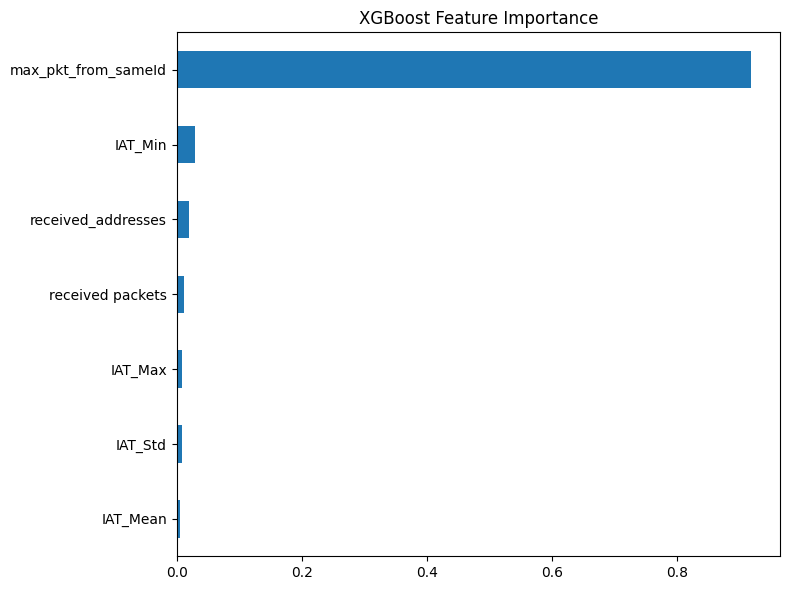

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import glob

# # === Load the dataset ===
# file_path = 'Dataset_timewin_28.json'

# with open(file_path, 'r') as f:
#     data = [json.loads(line) for line in f]

# df = pd.DataFrame(data)


file_list = glob.glob("Dataset_timewin_*.json")


# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())



# === Prepare Features and Labels ===
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Train XGBoost Model ===
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred = model.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Accuracy and Other Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"\nAccuracy Score:  {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score:    {recall:.4f}")
print(f"F1 Score:        {f1:.4f}")


# === Feature Importance Plot ===
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()
